In [251]:
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
import os 
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress
from sklearn import datasets
#%matplotlib inline

In [252]:
url = "https://statsapi.web.nhl.com/api/v1/teams"

In [253]:
response = requests.get(url + "?expand=team.stats")
print(response.content)
#print(json.dumps(response, indent=4, sort_keys=True))

b'{\n  "copyright" : "NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. \xc2\xa9 NHL 2020. All Rights Reserved.",\n  "teams" : [ {\n    "id" : 1,\n    "name" : "New Jersey Devils",\n    "link" : "/api/v1/teams/1",\n    "venue" : {\n      "name" : "Prudential Center",\n      "link" : "/api/v1/venues/null",\n      "city" : "Newark",\n      "timeZone" : {\n        "id" : "America/New_York",\n        "offset" : -4,\n        "tz" : "EDT"\n      }\n    },\n    "abbreviation" : "NJD",\n    "teamName" : "Devils",\n    "locationName" : "New Jersey",\n    "firstYearOfPlay" : "1982",\n    "division" : {\n      "id" : 18,\n      "name" : "Metropolitan",\n      "nameShort" : "Metro",\n      "link" : "/api/v1/divisions/18",\n      "abbreviation" : "M"\n    },\n    "conference" : {\n      "id" : 6,\n      "name" : "Eastern",\n      "link" : "/api/v1/conferences/6"\n    },\n    "franchise" : {\n      "franc

In [254]:
response = requests.get(url + "?expand=team.stats").json()
pprint(response)

{'copyright': 'NHL and the NHL Shield are registered trademarks of the '
              'National Hockey League. NHL and NHL team marks are the property '
              'of the NHL and its teams. © NHL 2020. All Rights Reserved.',
 'teams': [{'abbreviation': 'NJD',
            'active': True,
            'conference': {'id': 6,
                           'link': '/api/v1/conferences/6',
                           'name': 'Eastern'},
            'division': {'abbreviation': 'M',
                         'id': 18,
                         'link': '/api/v1/divisions/18',
                         'name': 'Metropolitan',
                         'nameShort': 'Metro'},
            'firstYearOfPlay': '1982',
            'franchise': {'franchiseId': 23,
                          'link': '/api/v1/franchises/23',
                          'teamName': 'Devils'},
            'franchiseId': 23,
            'id': 1,
            'link': '/api/v1/teams/1',
            'locationName': 'New Jersey',
    

                                                'faceOffsLost': 2051.0,
                                                'faceOffsTaken': 3788.0,
                                                'faceOffsWon': 1737.0,
                                                'gamesPlayed': 69,
                                                'goalsAgainstPerGame': 3.116,
                                                'goalsPerGame': 2.797,
                                                'losses': 31,
                                                'ot': 8,
                                                'penaltyKillPercentage': '74.6',
                                                'powerPlayGoals': 37.0,
                                                'powerPlayGoalsAgainst': 47.0,
                                                'powerPlayOpportunities': 196.0,
                                                'powerPlayPercentage': '18.9',
                                                'ptPctg':

                                                'faceOffsLost': '31st',
                                                'faceOffsTaken': '4th',
                                                'faceOffsWon': '17th',
                                                'goalsAgainstPerGame': '18th',
                                                'goalsPerGame': '2nd',
                                                'losses': '4th',
                                                'ot': '12th',
                                                'penaltyKillOpportunities': '30th',
                                                'penaltyKillPercentage': '6th',
                                                'powerPlayGoals': '13th',
                                                'powerPlayGoalsAgainst': '17th',
                                                'powerPlayOpportunities': '9th',
                                                'powerPlayPercentage': '17th',
                             

                                                'losses': 25,
                                                'ot': 9,
                                                'penaltyKillPercentage': '84.4',
                                                'powerPlayGoals': 59.0,
                                                'powerPlayGoalsAgainst': 31.0,
                                                'powerPlayOpportunities': 200.0,
                                                'powerPlayPercentage': '29.5',
                                                'ptPctg': '58.5',
                                                'pts': 83,
                                                'savePctg': 0.905,
                                                'shootingPctg': 10.6,
                                                'shotsAllowed': 32.0282,
                                                'shotsPerGame': 29.5775,
                                                'winLeadFirstPer': 0.815,
       

                                    'gameType': {'description': 'Regular '
                                                                'season',
                                                 'id': 'R',
                                                 'postseason': False}}}],
            'venue': {'city': 'Columbus',
                      'id': 5059,
                      'link': '/api/v1/venues/5059',
                      'name': 'Nationwide Arena',
                      'timeZone': {'id': 'America/New_York',
                                   'offset': -4,
                                   'tz': 'EDT'}}},
           {'abbreviation': 'MIN',
            'active': True,
            'conference': {'id': 5,
                           'link': '/api/v1/conferences/5',
                           'name': 'Western'},
            'division': {'abbreviation': 'C',
                         'id': 16,
                         'link': '/api/v1/divisions/16',
                         'name': 

In [255]:
print(json.dumps(response, indent=4, sort_keys=True))

{
    "copyright": "NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. \u00a9 NHL 2020. All Rights Reserved.",
    "teams": [
        {
            "abbreviation": "NJD",
            "active": true,
            "conference": {
                "id": 6,
                "link": "/api/v1/conferences/6",
                "name": "Eastern"
            },
            "division": {
                "abbreviation": "M",
                "id": 18,
                "link": "/api/v1/divisions/18",
                "name": "Metropolitan",
                "nameShort": "Metro"
            },
            "firstYearOfPlay": "1982",
            "franchise": {
                "franchiseId": 23,
                "link": "/api/v1/franchises/23",
                "teamName": "Devils"
            },
            "franchiseId": 23,
            "id": 1,
            "link": "/api/v1/teams/1",
            "locationName": "New 

In [256]:
teams = response["teams"]
pprint(teams)
# df = pd.DataFrame(response)

# df = df[["name", "faceOffsWon", "goalsPerGame", "powerPlayPercentage"]]

# print(len(df))
# df.head()

[{'abbreviation': 'NJD',
  'active': True,
  'conference': {'id': 6, 'link': '/api/v1/conferences/6', 'name': 'Eastern'},
  'division': {'abbreviation': 'M',
               'id': 18,
               'link': '/api/v1/divisions/18',
               'name': 'Metropolitan',
               'nameShort': 'Metro'},
  'firstYearOfPlay': '1982',
  'franchise': {'franchiseId': 23,
                'link': '/api/v1/franchises/23',
                'teamName': 'Devils'},
  'franchiseId': 23,
  'id': 1,
  'link': '/api/v1/teams/1',
  'locationName': 'New Jersey',
  'name': 'New Jersey Devils',
  'officialSiteUrl': 'http://www.newjerseydevils.com/',
  'shortName': 'New Jersey',
  'teamName': 'Devils',
  'teamStats': [{'splits': [{'stat': {'evGGARatio': 0.7821,
                                      'faceOffWinPercentage': '46.8',
                                      'faceOffsLost': 2121.0,
                                      'faceOffsTaken': 3990.0,
                                      'faceOffsWon': 

                                      'faceOffsLost': 1947.0,
                                      'faceOffsTaken': 3971.0,
                                      'faceOffsWon': 2024.0,
                                      'gamesPlayed': 70,
                                      'goalsAgainstPerGame': 2.386,
                                      'goalsPerGame': 3.243,
                                      'losses': 14,
                                      'ot': 12,
                                      'penaltyKillPercentage': '84.3',
                                      'powerPlayGoals': 57.0,
                                      'powerPlayGoalsAgainst': 34.0,
                                      'powerPlayOpportunities': 226.0,
                                      'powerPlayPercentage': '25.2',
                                      'ptPctg': '71.4',
                                      'pts': 100,
                                      'savePctg': 0.921,
                       

                                      'ot': 8,
                                      'penaltyKillPercentage': '78.5',
                                      'powerPlayGoals': 45.0,
                                      'powerPlayGoalsAgainst': 40.0,
                                      'powerPlayOpportunities': 211.0,
                                      'powerPlayPercentage': '21.3',
                                      'ptPctg': '56.5',
                                      'pts': 78,
                                      'savePctg': 0.899,
                                      'shootingPctg': 10.1,
                                      'shotsAllowed': 32.2754,
                                      'shotsPerGame': 32.6522,
                                      'winLeadFirstPer': 0.8,
                                      'winLeadSecondPer': 0.963,
                                      'winOppScoreFirst': 0.265,
                                      'winOutshootOpp': 0.429,
        

                                      'faceOffsLost': '7th',
                                      'faceOffsTaken': '10th',
                                      'faceOffsWon': '7th',
                                      'goalsAgainstPerGame': '5th',
                                      'goalsPerGame': '14th',
                                      'losses': '2nd',
                                      'ot': '5th',
                                      'penaltyKillOpportunities': '12th',
                                      'penaltyKillPercentage': '18th',
                                      'powerPlayGoals': '5th',
                                      'powerPlayGoalsAgainst': '16th',
                                      'powerPlayOpportunities': '19th',
                                      'powerPlayPercentage': '3rd',
                                      'ptPctg': '2nd',
                                      'pts': '2nd',
                                      'savePctRank': '

                                      'goalsAgainstPerGame': 2.714,
                                      'goalsPerGame': 3.371,
                                      'losses': 20,
                                      'ot': 8,
                                      'penaltyKillPercentage': '81.4',
                                      'powerPlayGoals': 46.0,
                                      'powerPlayGoalsAgainst': 39.0,
                                      'powerPlayOpportunities': 241.0,
                                      'powerPlayPercentage': '19.1',
                                      'ptPctg': '65.7',
                                      'pts': 92,
                                      'savePctg': 0.913,
                                      'shootingPctg': 10.5,
                                      'shotsAllowed': 31.3286,
                                      'shotsPerGame': 32.2429,
                                      'winLeadFirstPer': 0.731,
                  

                                      'savePctRank': '2nd',
                                      'shootingPctRank': '28th',
                                      'shotsAllowed': '18th',
                                      'shotsPerGame': '23rd',
                                      'winLeadFirstPer': '7th',
                                      'winLeadSecondPer': '10th',
                                      'winOppScoreFirst': '5th',
                                      'winOutshootOpp': '8th',
                                      'winOutshotByOpp': '8th',
                                      'winScoreFirst': '18th',
                                      'wins': '11th'},
                             'team': {'id': 25,
                                      'link': '/api/v1/teams/25',
                                      'name': 'Dallas Stars'}}],
                 'type': {'displayName': 'statsSingleSeason',
                          'gameType': {'description': 'Regular season'

                                      'shotsPerGame': '26th',
                                      'winLeadFirstPer': '18th',
                                      'winLeadSecondPer': '13th',
                                      'winOppScoreFirst': '25th',
                                      'winOutshootOpp': '25th',
                                      'winOutshotByOpp': '25th',
                                      'winScoreFirst': '28th',
                                      'wins': '28th'},
                             'team': {'id': 28,
                                      'link': '/api/v1/teams/28',
                                      'name': 'San Jose Sharks'}}],
                 'type': {'displayName': 'statsSingleSeason',
                          'gameType': {'description': 'Regular season',
                                       'id': 'R',
                                       'postseason': False}}}],
  'venue': {'city': 'San Jose',
            'link': '/api/v1/ven

In [277]:
teams = response["teams"]
goalsPerGame  =[]
name = []

for x in teams:
    output1 = x["teamStats"]
    output2 = output1[0]["splits"]
    output3 = output2[0]["stat"]
    goalsPerGame.append(output3["goalsPerGame"])
    name.append(x["name"])
print(goalsPerGame, name)

[2.681, 2.779, 3.329, 3.29, 3.203, 3.243, 2.797, 2.93, 2.676, 3.386, 3.191, 3.304, 3.471, 3.42, 2.971, 2.0, 3.072, 3.141, 2.914, 3.371, 3.141, 3.246, 2.563, 2.58, 2.529, 2.571, 2.571, 3.159, 3.0, 2.714, 3.155] ['New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'Boston Bruins', 'Buffalo Sabres', 'Montréal Canadiens', 'Ottawa Senators', 'Toronto Maple Leafs', 'Carolina Hurricanes', 'Florida Panthers', 'Tampa Bay Lightning', 'Washington Capitals', 'Chicago Blackhawks', 'Detroit Red Wings', 'Nashville Predators', 'St. Louis Blues', 'Calgary Flames', 'Colorado Avalanche', 'Edmonton Oilers', 'Vancouver Canucks', 'Anaheim Ducks', 'Dallas Stars', 'Los Angeles Kings', 'San Jose Sharks', 'Columbus Blue Jackets', 'Minnesota Wild', 'Winnipeg Jets', 'Arizona Coyotes', 'Vegas Golden Knights']


In [273]:
teams = response["teams"]
powerPlayOpportunities  =[]
powerPlayGoals = []
name = []

for x in teams:
    output1 = x["teamStats"]
    output2 = output1[0]["splits"]
    output3 = output2[0]["stat"]
    powerPlayOpportunities.append(output3["powerPlayOpportunities"])
    powerPlayGoals.append(output3["powerPlayGoals"])
    name.append(x["name"])
print(powerPlayOpportunities, powerPlayGoals, name)

[234.0, 168.0, 227.0, 226.0, 211.0, 226.0, 196.0, 186.0, 211.0, 195.0, 206.0, 211.0, 212.0, 216.0, 217.0, 215.0, 226.0, 202.0, 193.0, 241.0, 200.0, 236.0, 184.0, 199.0, 193.0, 189.0, 189.0, 216.0, 205.0, 214.0, 191.0] [42.0, 29.0, 52.0, 47.0, 42.0, 57.0, 37.0, 33.0, 30.0, 45.0, 46.0, 45.0, 49.0, 42.0, 33.0, 32.0, 39.0, 49.0, 41.0, 46.0, 59.0, 57.0, 27.0, 42.0, 33.0, 33.0, 31.0, 46.0, 42.0, 41.0, 42.0] ['New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'Boston Bruins', 'Buffalo Sabres', 'Montréal Canadiens', 'Ottawa Senators', 'Toronto Maple Leafs', 'Carolina Hurricanes', 'Florida Panthers', 'Tampa Bay Lightning', 'Washington Capitals', 'Chicago Blackhawks', 'Detroit Red Wings', 'Nashville Predators', 'St. Louis Blues', 'Calgary Flames', 'Colorado Avalanche', 'Edmonton Oilers', 'Vancouver Canucks', 'Anaheim Ducks', 'Dallas Stars', 'Los Angeles Kings', 'San Jose Sharks', 'Columbus Blue Jackets', 'Minnesota Wild', 'Winnipeg Jets',

In [272]:
teams = response["teams"]
savePctg  =[]
wins = []
name = []

for x in teams:
    output1 = x["teamStats"]
    output2 = output1[0]["splits"]
    output3 = output2[0]["stat"]
    savePctg.append(output3["savePctg"])
    wins.append(output3["wins"])
    name.append(x["name"])
print(savePctg, wins, name)

[0.901, 0.911, 0.908, 0.903, 0.904, 0.921, 0.9, 0.9, 0.9, 0.901, 0.903, 0.899, 0.91, 0.898, 0.913, 0.886, 0.901, 0.91, 0.906, 0.913, 0.905, 0.907, 0.901, 0.92, 0.899, 0.895, 0.913, 0.897, 0.913, 0.919, 0.9] [28, 35, 37, 41, 40, 44, 30, 31, 25, 36, 38, 35, 43, 41, 32, 17, 35, 42, 36, 42, 37, 36, 29, 37, 29, 29, 33, 35, 37, 33, 39] ['New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'Boston Bruins', 'Buffalo Sabres', 'Montréal Canadiens', 'Ottawa Senators', 'Toronto Maple Leafs', 'Carolina Hurricanes', 'Florida Panthers', 'Tampa Bay Lightning', 'Washington Capitals', 'Chicago Blackhawks', 'Detroit Red Wings', 'Nashville Predators', 'St. Louis Blues', 'Calgary Flames', 'Colorado Avalanche', 'Edmonton Oilers', 'Vancouver Canucks', 'Anaheim Ducks', 'Dallas Stars', 'Los Angeles Kings', 'San Jose Sharks', 'Columbus Blue Jackets', 'Minnesota Wild', 'Winnipeg Jets', 'Arizona Coyotes', 'Vegas Golden Knights']


In [257]:
print(type(layer1))
# layer2 = response["teams"]["teamStats"]
# layer2
# layer2 = layer1["teamStats"]
# pprint(layer2)

<class 'list'>


In [258]:
teams = response["teams"]
goalspergame  =[]
gapg = []
name = []

for x in teams:
    output1 = x["teamStats"]
    output2 = output1[0]["splits"]
    output3 = output2[0]["stat"]
    goalspergame.append(output3["goalsPerGame"])
    gapg.append(output3["goalsAgainstPerGame"])
    name.append(x["name"])
print(goalspergame, gapg, name)
#     [teamStats][splits][stat]
    
#     print(team["name"])response
    
#     print(teamStats["teamStats"][0])
#     print(splits["splits"][0])
#     print(team["stat"][0])
    
    
    
    
    
    
#     break #DELETE THIS IN THE END! OR ELSE!
#     #create variable, print figure out how to dig in, repeat.. work on 1st team, get it printing what you want, then delete BREAK and it should work for every team
# for teamStats
    
#teamstats0 = ["teamStats"][0]
    
#print(team[0]teamStats()
               
# teamstats0 = teams[0]["teamStats"]
# pprint(teamstats0)

# name0 = teams[0]["name"]
# pprint(name0)
# name1 = teams[1]["name"]
# pprint(name1)
# name2 = teams[2]["name"]
# pprint(name2)
# name3 = teams[3]["name"]
# pprint(name3)
# name4 = teams[4]["name"]
# pprint(name4)
# name5 = teams[5]["name"]
# pprint(name5)
# name6 = teams[6]["name"]
# pprint(name6)
# name7 = teams[7]["name"]
# pprint(name7)
# name8 = teams[8]["name"]
# pprint(name8)
# name9 = teams[9]["name"]
# pprint(name9)
# name10 = teams[10]["name"]
# pprint(name10)
# name11 = teams[11]["name"]
# pprint(name11)
# name12 = teams[12]["name"]
# pprint(name12)
# name13 = teams[13]["name"]
# pprint(name13)
# name14 = teams[14]["name"]
# pprint(name14)
# name15 = teams[15]["name"]
# pprint(name15)
# name16 = teams[16]["name"]
# pprint(name16)
# name17 = teams[17]["name"]
# pprint(name17)
# name18 = teams[18]["name"]
# pprint(name18)
# name19 = teams[19]["name"]
# pprint(name19)
# name20 = teams[20]["name"]
# pprint(name20)
# name21 = teams[21]["name"]
# pprint(name21)
# name22 = teams[22]["name"]
# pprint(name22)
# name23 = teams[23]["name"]
# pprint(name23)
# name24 = teams[24]["name"]
# pprint(name24)
# name25 = teams[25]["name"]
# pprint(name25)
# name26 = teams[26]["name"]
# pprint(name26)
# name27 = teams[27]["name"]
# pprint(name27)
# name28 = teams[28]["name"]
# pprint(name28)
# name29 = teams[29]["name"]
# pprint(name29)
# name30 = teams[30]["name"]
# pprint(name30)

[2.681, 2.779, 3.329, 3.29, 3.203, 3.243, 2.797, 2.93, 2.676, 3.386, 3.191, 3.304, 3.471, 3.42, 2.971, 2.0, 3.072, 3.141, 2.914, 3.371, 3.141, 3.246, 2.563, 2.58, 2.529, 2.571, 2.571, 3.159, 3.0, 2.714, 3.155] [3.246, 2.794, 3.143, 2.768, 2.841, 2.386, 3.116, 3.099, 3.352, 3.171, 2.838, 3.246, 2.771, 3.072, 3.057, 3.732, 3.101, 2.676, 3.057, 2.714, 3.028, 3.101, 3.169, 2.522, 2.986, 3.214, 2.614, 3.145, 2.831, 2.614, 2.944] ['New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'Boston Bruins', 'Buffalo Sabres', 'Montréal Canadiens', 'Ottawa Senators', 'Toronto Maple Leafs', 'Carolina Hurricanes', 'Florida Panthers', 'Tampa Bay Lightning', 'Washington Capitals', 'Chicago Blackhawks', 'Detroit Red Wings', 'Nashville Predators', 'St. Louis Blues', 'Calgary Flames', 'Colorado Avalanche', 'Edmonton Oilers', 'Vancouver Canucks', 'Anaheim Ducks', 'Dallas Stars', 'Los Angeles Kings', 'San Jose Sharks', 'Columbus Blue Jackets', 'Minnesota 

In [259]:
df = pd.DataFrame({ "name": name, "goals per game": goalspergame, "goals against per game": gapg})
df

,name,goals per game,goals against per game
0,New Jersey Devils,2.681,3.246
1,New York Islanders,2.779,2.794
2,New York Rangers,3.329,3.143
3,Philadelphia Flyers,3.290,2.768
4,Pittsburgh Penguins,3.203,2.841
5,Boston Bruins,3.243,2.386
6,Buffalo Sabres,2.797,3.116
7,Montréal Canadiens,2.930,3.099
8,Ottawa Senators,2.676,3.352
9,Toronto Maple Leafs,3.386,3.171


NameError: name 'combined_gpg' is not defined

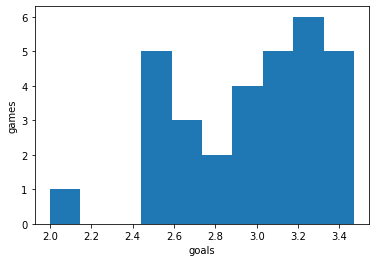

NormaltestResult(statistic=3.6846102796426714, pvalue=0.15845175136131134)


In [260]:
plt.hist(goalspergame)
plt.xlabel('goals')
plt.ylabel('games')
plt.show()
print(sts.normaltest(goalspergame))

In [261]:
mean_numpy = np.mean(goalspergame)
median_numpy = np.median(goalspergame)
print(f"The Mean Goals Per Game Is {mean_numpy}")
print(f"The Median Goals Per Game Is {median_numpy}")
mean_numpy = np.mean(gapg)
median_numpy = np.median(gapg)
print(f"The Mean Goals Against Per Game Is {mean_numpy}")
print(f"The Median Goals Against Per Game Is {median_numpy}")

The Mean Goals Per Game Is 2.9805806451612904
The Median Goals Per Game Is 3.072
The Mean Goals Against Per Game Is 2.978967741935484
The Median Goals Against Per Game Is 3.057


In [262]:
var_numpy = np.var(goalspergame, ddof = 1)
print(f"The variance for goals per game is {var_numpy}")
sd_numpy = np.std(goalspergame, ddof = 1)
print(f"The standard deviation for goals per game is {sd_numpy}")

The variance for goals per game is 0.11994878494623654
The standard deviation for goals per game is 0.3463362310620079


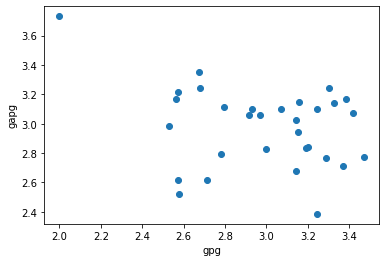

In [263]:
# df.plot.scatter(x = "goals per game", y = "goals against per game")
# x = np.array(["goals per game"])
# y = np.array(["goals against per game"])
x_values = df["goals per game"]
y_values = df["goals against per game"]
plt.scatter(x_values,y_values)
plt.xlabel('gpg')
plt.ylabel('gapg')
plt.show()

The r-squared is: 0.09434293038655858


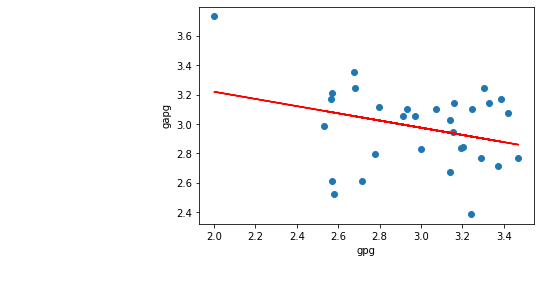

In [268]:
x_values = df["goals per game"]
y_values = df["goals against per game"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,2),fontsize=15,color="red")
plt.xlabel('gpg')
plt.ylabel('gapg')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [202]:
teams = response["teams"]
goalspergame  =[]
gapg = []
for x in teams:
    output1=x["teamStats"]
    output2 = output1[0]["splits"]
    output3 = output2[0]["stat"]
    goalspergame.append(output3["goalsPerGame"])
    gapg.append(output3["goalsAgainstPerGame"])
print(goalspergame, gapg,)

name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
[2.681, 2.779, 3.329, 3.29, 3.203, 3.243, 2.797, 2.93, 2.676, 3.386, 3.191, 3.304, 3.471, 3.42, 2.971, 2.0, 3.072, 3.141, 2.914, 3.371, 3.141, 3.246, 2.563, 2.58, 2.529, 2.571, 2.571, 3.159, 3.0, 2.714, 3.155] [3.246, 2.794, 3.143, 2.768, 2.841, 2.386, 3.116, 3.099, 3.352, 3.171, 2.838, 3.246, 2.771, 3.072, 3.057, 3.732, 3.101, 2.676, 3.057, 2.714, 3.028, 3.101, 3.169, 2.522, 2.986, 3.214, 2.614, 3.145, 2.831, 2.614, 2.944]


In [196]:
# x_limit = 4
# x_axis = np.arange(0, x_limit, 0.001)
# data = []

In [197]:
# plt.scatter(x_axis, goalspergame, marker="o", facecolors="red", edgecolors="black",
#             s=x_axis, alpha=0.75)

In [122]:
# teamstats = teamstats()
# for(splits), number in teamstats.items:
#     teamstats[splits] = number

In [123]:
# teamstats = teams["teamStats"][0]
# pprint(teamstats)

In [124]:
teamstats0 = teams[0]["teamStats"]
pprint(teamstats0)

[{'splits': [{'stat': {'evGGARatio': 0.7821,
                       'faceOffWinPercentage': '46.8',
                       'faceOffsLost': 2121.0,
                       'faceOffsTaken': 3990.0,
                       'faceOffsWon': 1869.0,
                       'gamesPlayed': 69,
                       'goalsAgainstPerGame': 3.246,
                       'goalsPerGame': 2.681,
                       'losses': 29,
                       'ot': 12,
                       'penaltyKillPercentage': '82.3',
                       'powerPlayGoals': 42.0,
                       'powerPlayGoalsAgainst': 39.0,
                       'powerPlayOpportunities': 234.0,
                       'powerPlayPercentage': '17.9',
                       'ptPctg': '49.3',
                       'pts': 68,
                       'savePctg': 0.901,
                       'shootingPctg': 8.7,
                       'shotsAllowed': 32.6957,
                       'shotsPerGame': 30.6812,
                       '

In [125]:
splits0 = teamstats0[0]["splits"]
pprint(splits0)

[{'stat': {'evGGARatio': 0.7821,
           'faceOffWinPercentage': '46.8',
           'faceOffsLost': 2121.0,
           'faceOffsTaken': 3990.0,
           'faceOffsWon': 1869.0,
           'gamesPlayed': 69,
           'goalsAgainstPerGame': 3.246,
           'goalsPerGame': 2.681,
           'losses': 29,
           'ot': 12,
           'penaltyKillPercentage': '82.3',
           'powerPlayGoals': 42.0,
           'powerPlayGoalsAgainst': 39.0,
           'powerPlayOpportunities': 234.0,
           'powerPlayPercentage': '17.9',
           'ptPctg': '49.3',
           'pts': 68,
           'savePctg': 0.901,
           'shootingPctg': 8.7,
           'shotsAllowed': 32.6957,
           'shotsPerGame': 30.6812,
           'winLeadFirstPer': 0.5,
           'winLeadSecondPer': 0.704,
           'winOppScoreFirst': 0.342,
           'winOutshootOpp': 0.417,
           'winOutshotByOpp': 0.381,
           'winScoreFirst': 0.484,
           'wins': 28},
  'team': {'id': 1, 'link': '/api

In [126]:
stat0 = splits0[0]["stat"]
pprint(stat0)

{'evGGARatio': 0.7821,
 'faceOffWinPercentage': '46.8',
 'faceOffsLost': 2121.0,
 'faceOffsTaken': 3990.0,
 'faceOffsWon': 1869.0,
 'gamesPlayed': 69,
 'goalsAgainstPerGame': 3.246,
 'goalsPerGame': 2.681,
 'losses': 29,
 'ot': 12,
 'penaltyKillPercentage': '82.3',
 'powerPlayGoals': 42.0,
 'powerPlayGoalsAgainst': 39.0,
 'powerPlayOpportunities': 234.0,
 'powerPlayPercentage': '17.9',
 'ptPctg': '49.3',
 'pts': 68,
 'savePctg': 0.901,
 'shootingPctg': 8.7,
 'shotsAllowed': 32.6957,
 'shotsPerGame': 30.6812,
 'winLeadFirstPer': 0.5,
 'winLeadSecondPer': 0.704,
 'winOppScoreFirst': 0.342,
 'winOutshootOpp': 0.417,
 'winOutshotByOpp': 0.381,
 'winScoreFirst': 0.484,
 'wins': 28}


In [151]:
fow = stat0["faceOffsWon"]
gpg = stat0["goalsPerGame"]

In [161]:
keys =["fow", "gpg"]
values = [fow, gpg]
print(fow)
print(values)

1869.0
[1869.0, 2.681]


<BarContainer object of 2 artists>

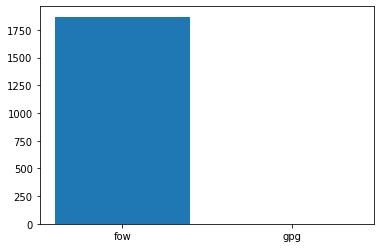

In [160]:
# keys = stat0.keys()
# values = stat0.values()
plt.bar(keys, values)
# print(keys)
# print(values)

In [131]:
# fow = stat0["faceOffsWon"]
# gpg = stat0["goalsPerGame"]

In [134]:
# df = df(fow, gpg)
# df

In [127]:
# print(f"Faceoffs won was {stat0['faceOffsWon']}.")
# print(f"Goals Per Game was {stat0['goalsPerGame']}.")

Faceoffs won was 1869.0.
Goals Per Game was 2.681.


In [149]:
# njdevils = 'faceOffsWon'.plot(kind='bar')

AttributeError: 'str' object has no attribute 'plot'

In [ ]:
# statistics = ["goalsPerGame", "faceOffsWon"]
# responsestats = []
# for statistics in statistics:
#     data = requests.get()
#     responsestats.append(data)
#     print()